In [1]:
#This is the code from a four hour data challenge where I had to predict employee turnover at a conglomerate

import pandas as pd
from datetime import datetime, timedelta, time
import numpy as np
import pandas_profiling
import missingno as msno
from collections import defaultdict
import seaborn as sns
import sys

print("Python Version:", sys.version)
print("Pandas Version:", pd.__version__)
print("Numpy Version:", np.__version__)
print("Seaborn Version:", sns.__version__)

main_path = '/Users/PC/Desktop/Insight/'

Python Version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Pandas Version: 0.24.2
Numpy Version: 1.16.2
Seaborn Version: 0.9.0


In [2]:
df = pd.read_csv(main_path + 'EmployeeRetention/employee_retention_data.csv', low_memory=False)

In [3]:
#Running Exploratory Data Analysis
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,24702.0,501604.403530,288909.026101,36.0,250133.75,500793.0,753137.25,999969.0
company_id,24702.0,3.426969,2.700011,1.0,1.00,2.0,5.00,12.0
seniority,24702.0,14.127803,8.089520,1.0,7.00,14.0,21.00,99.0
salary,24702.0,138183.345478,76058.184573,17000.0,79000.00,123000.0,187000.00,408000.0


In [6]:
pandas_profiling.ProfileReport(df)

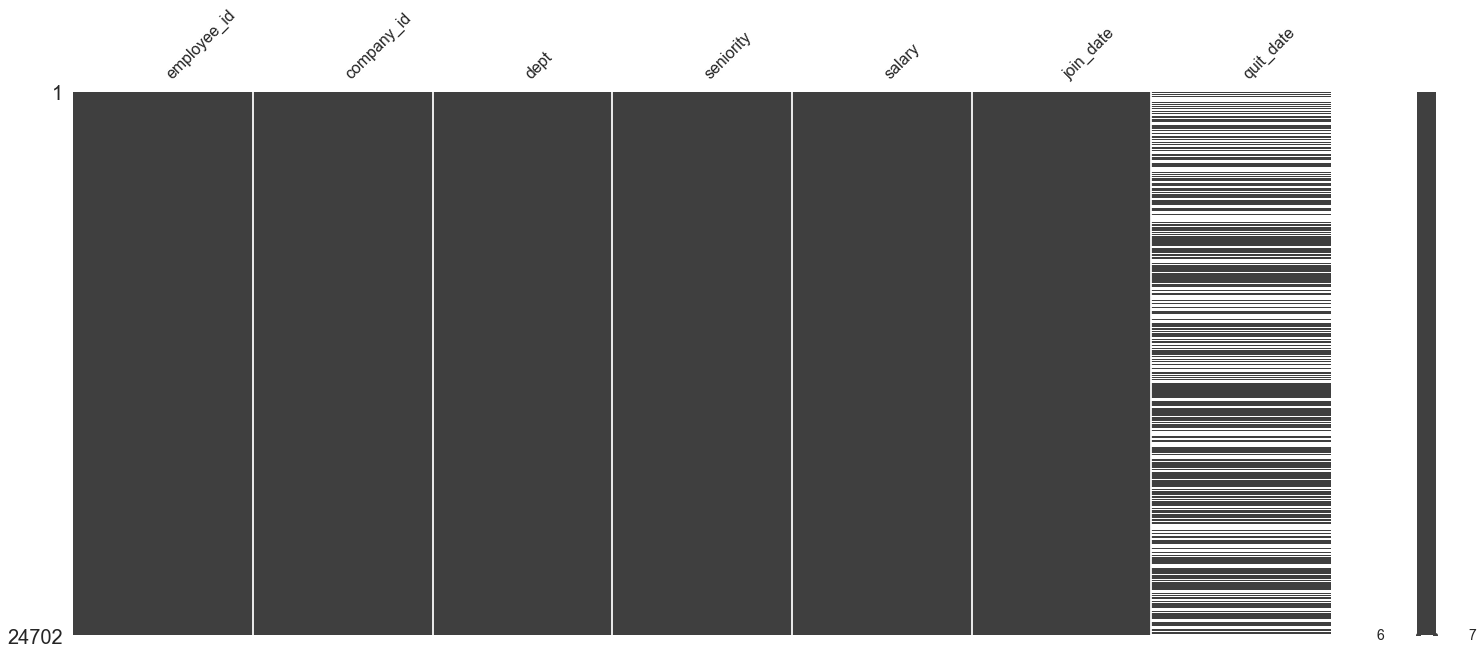

In [7]:
#Looking for Missing Data (quit date missing just means they were still working so no missing data!  Yay!)
msno.matrix(df)

In [8]:
#Dept counts
df['dept'].value_counts()

customer_service    9180
engineer            4613
data_science        3190
sales               3172
marketing           3167
design              1380
Name: dept, dtype: int64

In [9]:
#Company counts
df['company_id'].value_counts()

1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
12      24
11      16
Name: company_id, dtype: int64

In [10]:
df['join_date_clean'] = [datetime.strptime(x, '%Y-%m-%d') for x in df['join_date']]

In [11]:
#Setting a column for later use
df['quit']=2

In [12]:
df.sort_values(by='quit_date') 

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_date_clean,quit
24518,751615.0,6,customer_service,6,63000.0,2011-01-31,2011-10-13,2011-01-31,2
8465,972130.0,10,marketing,20,147000.0,2011-02-22,2011-10-14,2011-02-22,2
15523,581263.0,1,sales,5,118000.0,2011-01-24,2011-10-21,2011-01-24,2
15602,135834.0,4,engineer,16,169000.0,2011-02-07,2011-10-28,2011-02-07,2
3777,71407.0,1,customer_service,19,107000.0,2011-01-25,2011-11-11,2011-01-25,2
23303,202573.0,1,engineer,10,199000.0,2011-01-31,2011-11-22,2011-01-31,2
10602,571350.0,1,marketing,7,119000.0,2011-01-31,2011-11-25,2011-01-31,2
11221,370889.0,2,engineer,21,255000.0,2011-02-22,2011-11-25,2011-02-22,2
3855,4356.0,6,customer_service,26,92000.0,2011-02-07,2011-12-02,2011-02-07,2
4280,380243.0,8,customer_service,5,66000.0,2011-02-14,2011-12-02,2011-02-14,2


In [13]:
#Getting Employess who quit
df2=df[df.quit_date >= '2011-01-01']
df2=pd.DataFrame(data=df2)

In [14]:
df2['quit']=1

In [15]:
df2.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_date_clean,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014-03-24,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013-04-29,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012-05-14,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011-10-17,1
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,2012-01-30,1


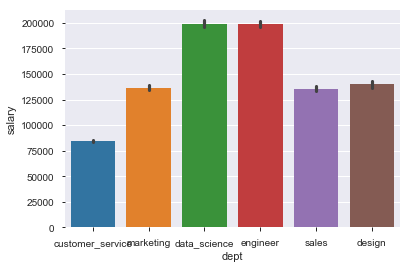

In [16]:
#Plotting by Department
ax = sns.barplot(x="dept", y="salary", data=df2)

In [17]:
#Getting Employees who Didn't Quit
df3=df[df.quit_date.isna()]
df3=pd.DataFrame(data=df3)

In [18]:
df3['quit']=0

In [19]:
#Making quit date to a datetime object
df2['quit_date_clean'] = [datetime.strptime(x, '%Y-%m-%d') for x in df2['quit_date']]

In [20]:
#Getting the week of quitting
df2['quitweek']= [x.isocalendar()[1] for x in df2['quit_date_clean']]

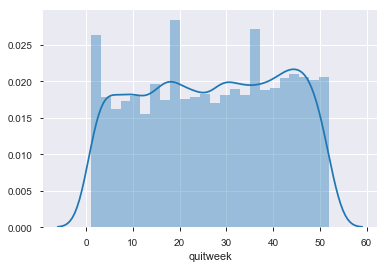

In [21]:
sns.distplot(df2['quitweek'])

In [22]:
#Getting the month of quitting
df2['quitmonth'] = [x.month for x in df2['quit_date_clean']]

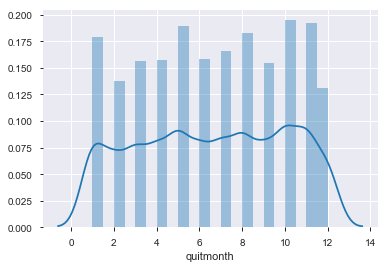

In [23]:
sns.distplot(df2['quitmonth'])

In [24]:
#Breaking out Year of Quitting
df2['quityear'] = [x.year for x in df2['quit_date_clean']]

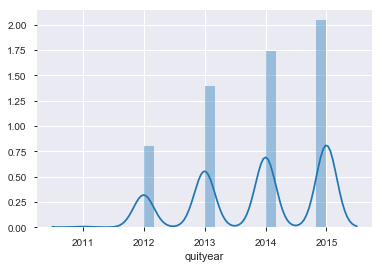

In [25]:
sns.distplot(df2['quityear'])

In [26]:
#Breaking out Year of Joining
df['joinyear'] = [x.year for x in df['join_date_clean']]

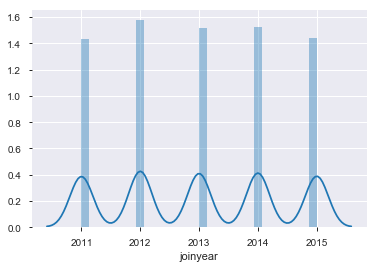

In [27]:
sns.distplot(df['joinyear'])

In [28]:
df['joinmonth'] = [x.month for x in df['join_date_clean']]

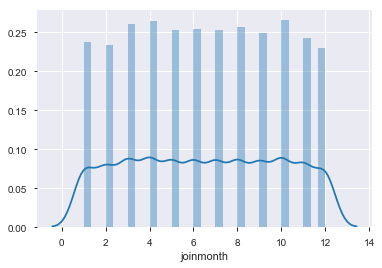

In [29]:
sns.distplot(df['joinmonth'])

In [30]:
#Setting weekday numbers
df2['weekday'] = df2[['quit_date_clean']].apply(lambda x: datetime.strftime(x['quit_date_clean'], '%A'), axis=1)
wkdaynbr = {'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 0,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}
df2['wkdaynbr'] = df2['weekday'].map(wkdaynbr)

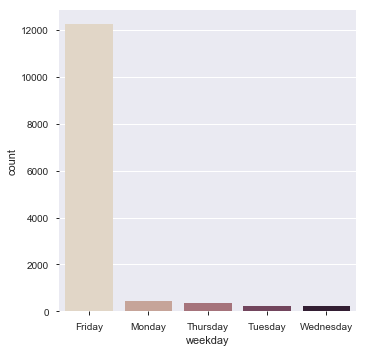

In [31]:
#Quitting by day of Week
sns.catplot(x="weekday", kind="count", palette="ch:.25", data=df2);

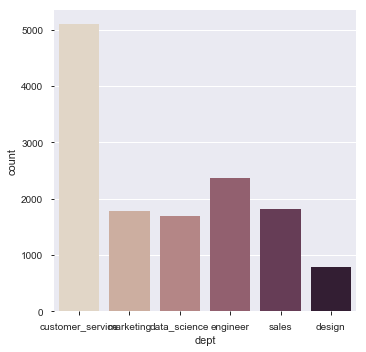

In [32]:
#Quitting by Department
sns.catplot(x="dept", kind="count", palette="ch:.25", data=df2)

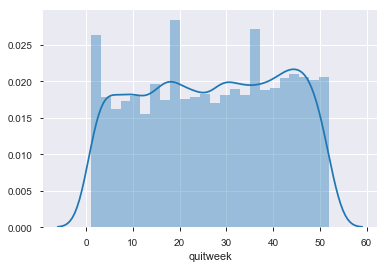

In [33]:
sns.distplot(df2['quitweek'])

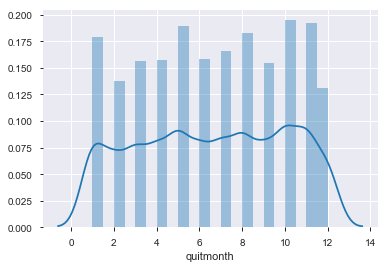

In [34]:
sns.distplot(df2['quitmonth'])

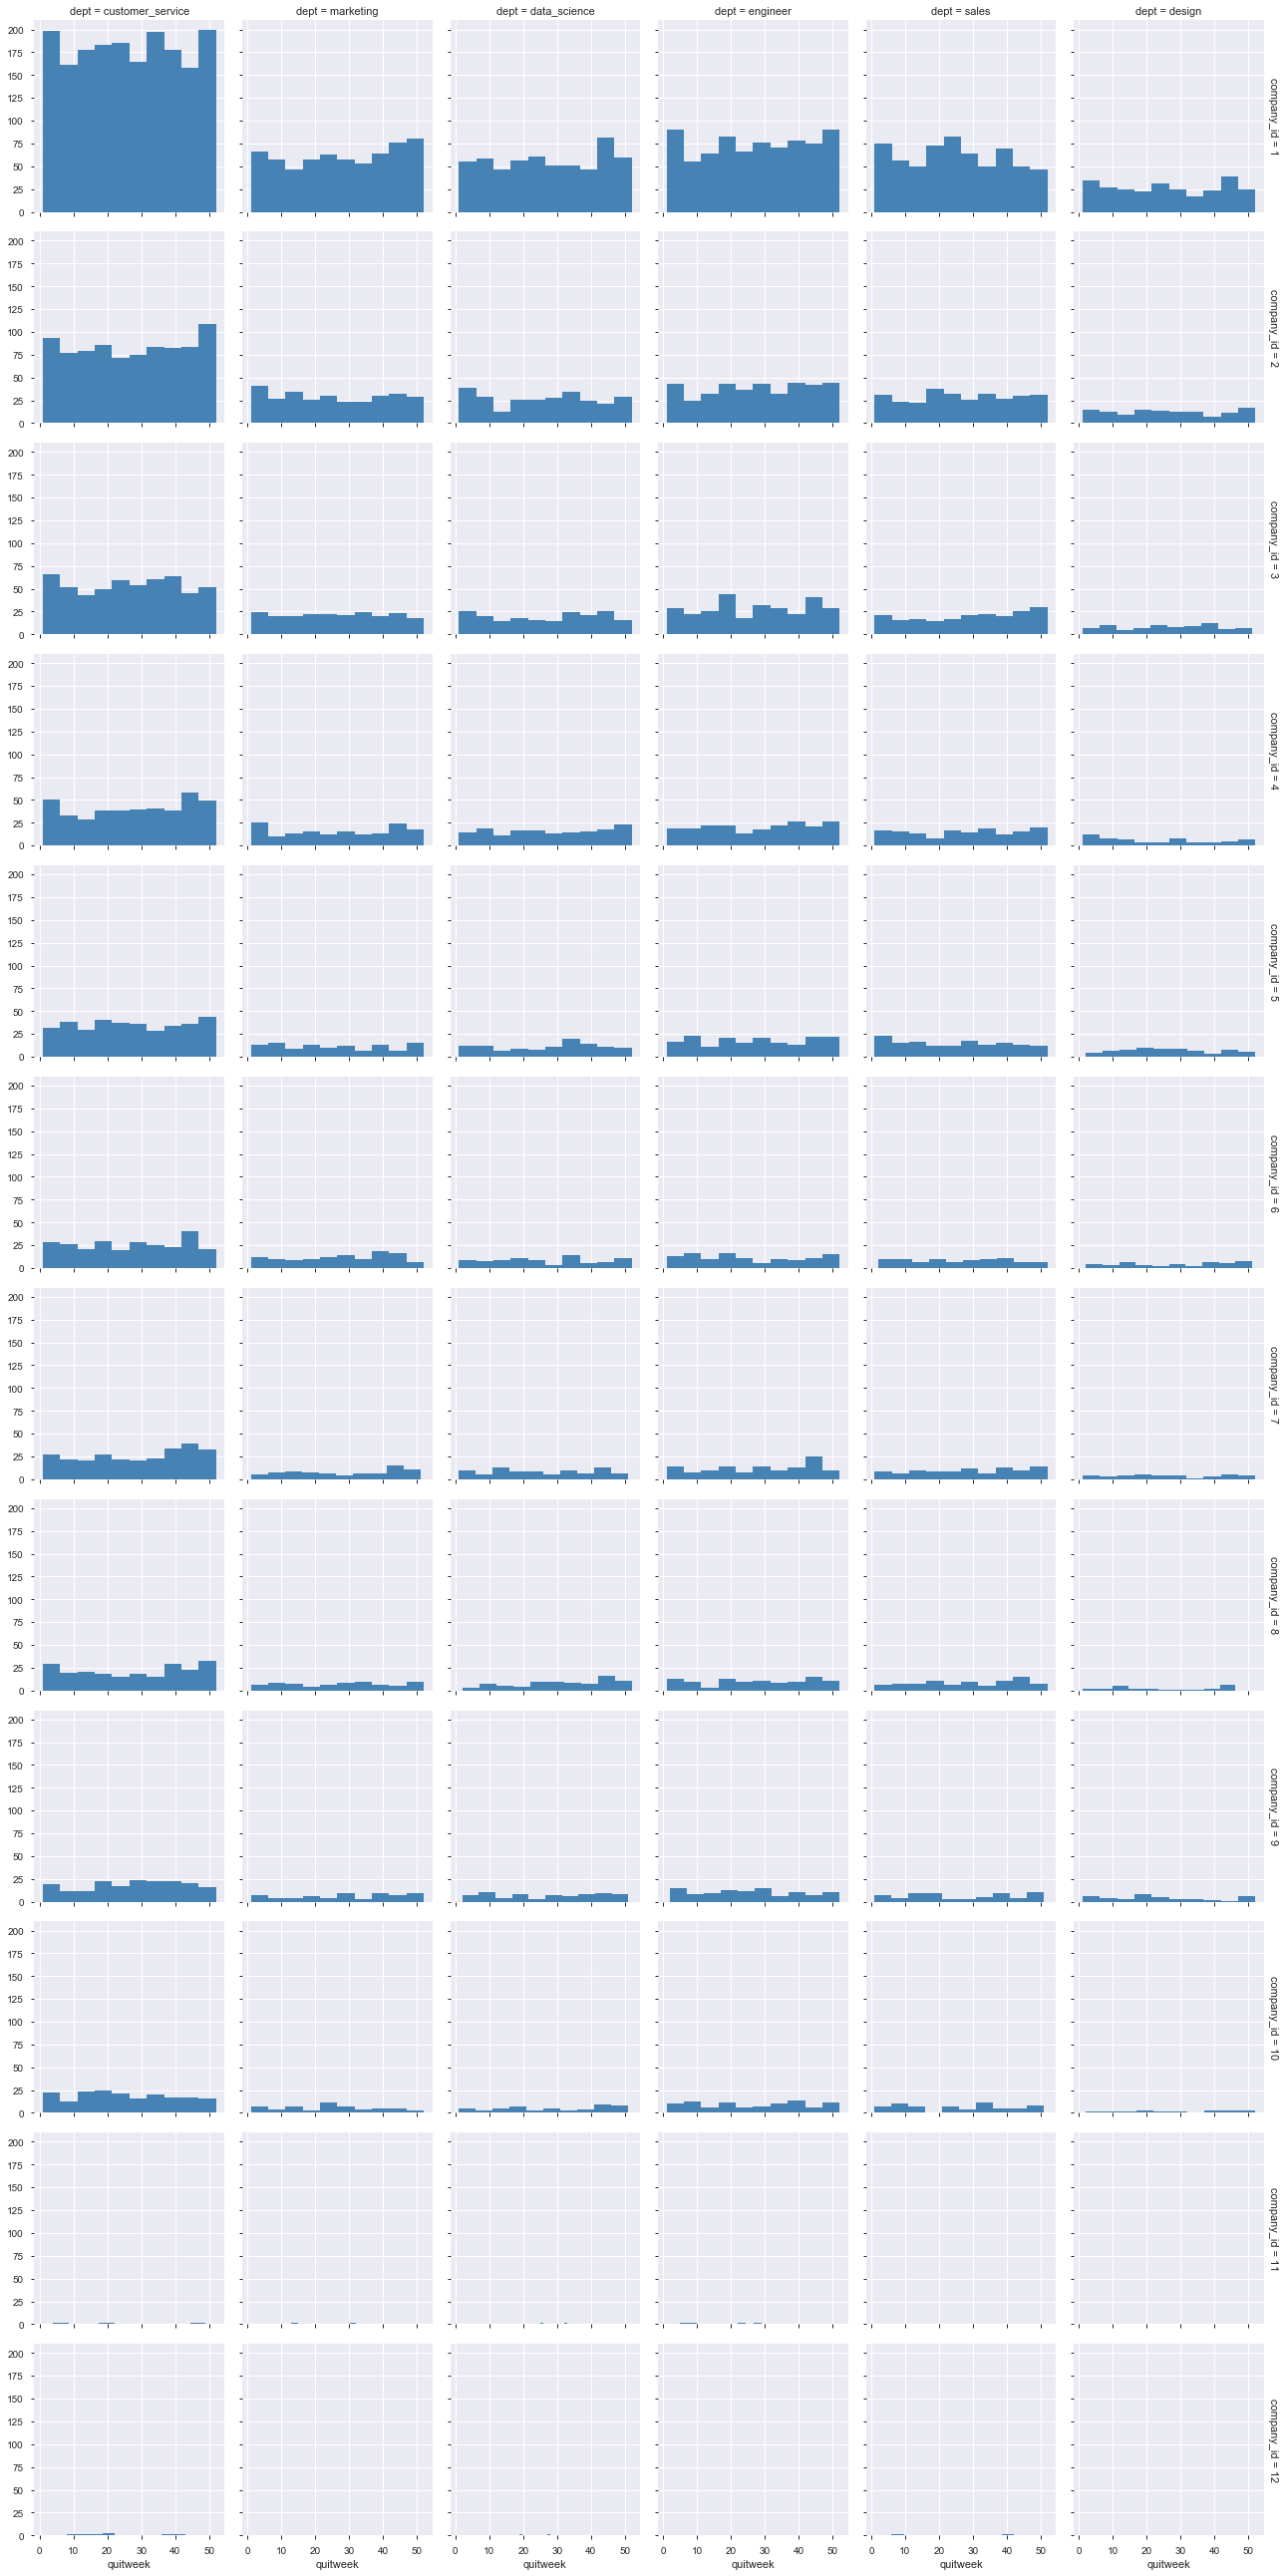

In [35]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df2, row="company_id", col="dept", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "quitweek", color="steelblue")

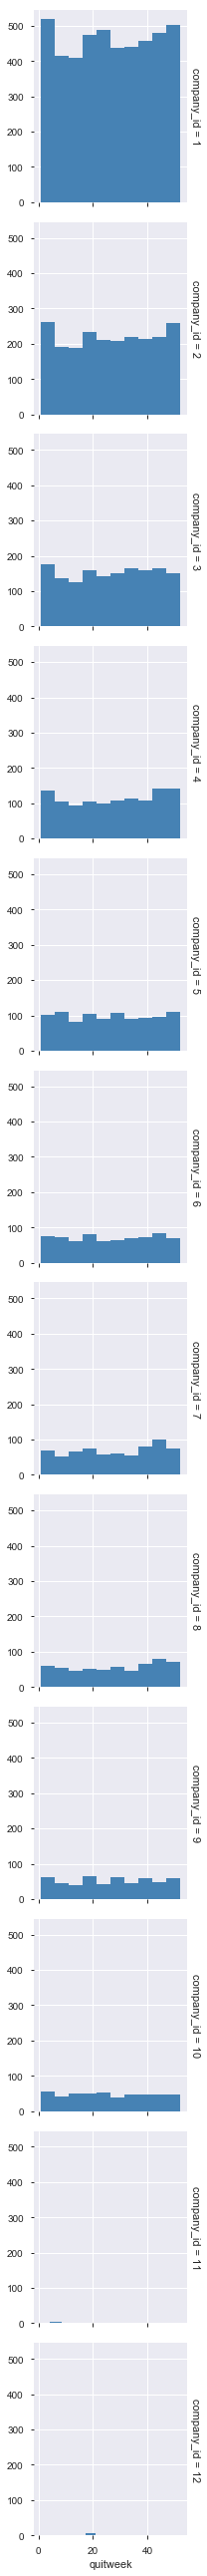

In [36]:
g = sns.FacetGrid(df2, row="company_id", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "quitweek", color="steelblue")

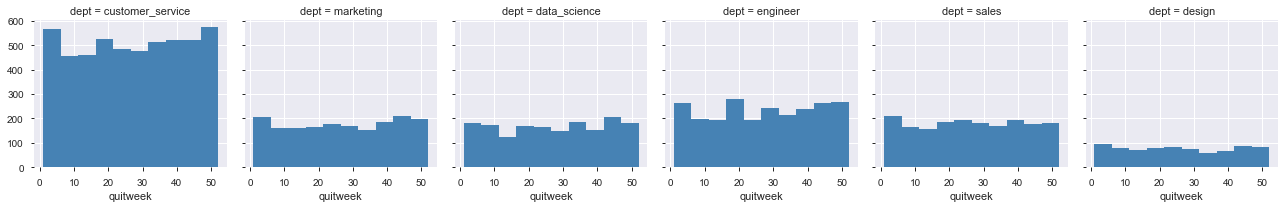

In [37]:
g = sns.FacetGrid(df2, col="dept", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "quitweek", color="steelblue")

In [38]:
#Creating a length of work variable for those who quit
df2['lengthofwork'] = df2['quit_date_clean'].sub(df2['join_date_clean'], axis=0)
df2.head()  

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_date_clean,quit,quit_date_clean,quitweek,quitmonth,quityear,weekday,wkdaynbr,lengthofwork
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014-03-24,1,2015-10-30,44,10,2015,Friday,5,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013-04-29,1,2014-04-04,14,4,2014,Friday,5,340 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012-05-14,1,2013-06-07,23,6,2013,Friday,5,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011-10-17,1,2014-08-22,34,8,2014,Friday,5,1040 days
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,2012-01-30,1,2013-08-30,35,8,2013,Friday,5,578 days


In [39]:
#Creating a length of work variable for those who didn't quit
df3['quit_date']='2015-12-13'
df3['quit_date_clean'] = [datetime.strptime(x, '%Y-%m-%d') for x in df3['quit_date']]
df3['lengthofwork'] = df3['quit_date_clean'].sub(df3['join_date_clean'], axis=0)

In [40]:
df2.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_date_clean,quit,quit_date_clean,quitweek,quitmonth,quityear,weekday,wkdaynbr,lengthofwork
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,2014-03-24,1,2015-10-30,44,10,2015,Friday,5,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,2013-04-29,1,2014-04-04,14,4,2014,Friday,5,340 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,2012-05-14,1,2013-06-07,23,6,2013,Friday,5,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,2011-10-17,1,2014-08-22,34,8,2014,Friday,5,1040 days
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,2012-01-30,1,2013-08-30,35,8,2013,Friday,5,578 days


In [41]:
df3.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_date_clean,quit,quit_date_clean,lengthofwork
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,2014-10-13,0,2015-12-13,426 days
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13,2013-10-21,0,2015-12-13,783 days
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2015-12-13,2014-03-05,0,2015-12-13,648 days
9,504159.0,1,sales,7,104000.0,2012-06-12,2015-12-13,2012-06-12,0,2015-12-13,1279 days
11,904158.0,2,marketing,17,230000.0,2015-05-11,2015-12-13,2015-05-11,0,2015-12-13,216 days


In [42]:
df3.shape

(11192, 11)

In [43]:
df2.shape

(13510, 16)

In [44]:
df3["quitweek"] = np.nan
df3["quitmonth"]= np.nan

In [45]:
#Rejoining the quitters and non-quitters
df4=pd.concat([df2, df3])

C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\virtualMH\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [46]:
#Making length of work numeric
df4['lengthofwork'] = df4['lengthofwork'] / np.timedelta64(1, 'D')

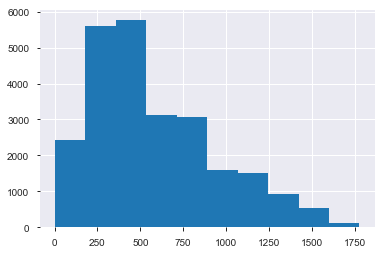

In [47]:
df4['lengthofwork'].hist()

In [48]:
df4.to_csv(main_path + '/Employ.csv')

In [49]:
df4.head()

,company_id,dept,employee_id,join_date,join_date_clean,lengthofwork,quit,quit_date,quit_date_clean,quitmonth,quitweek,quityear,salary,seniority,weekday,wkdaynbr
0,7,customer_service,13021.0,2014-03-24,2014-03-24,585.0,1,2015-10-30,2015-10-30,10.0,44.0,2015.0,89000.0,28,Friday,5.0
1,7,marketing,825355.0,2013-04-29,2013-04-29,340.0,1,2014-04-04,2014-04-04,4.0,14.0,2014.0,183000.0,20,Friday,5.0
3,7,customer_service,662910.0,2012-05-14,2012-05-14,389.0,1,2013-06-07,2013-06-07,6.0,23.0,2013.0,115000.0,20,Friday,5.0
4,2,data_science,256971.0,2011-10-17,2011-10-17,1040.0,1,2014-08-22,2014-08-22,8.0,34.0,2014.0,276000.0,23,Friday,5.0
5,4,data_science,509529.0,2012-01-30,2012-01-30,578.0,1,2013-08-30,2013-08-30,8.0,35.0,2013.0,165000.0,14,Friday,5.0


In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24702 entries, 0 to 24698
Data columns (total 16 columns):
company_id         24702 non-null int64
dept               24702 non-null object
employee_id        24702 non-null float64
join_date          24702 non-null object
join_date_clean    24702 non-null datetime64[ns]
lengthofwork       24702 non-null float64
quit               24702 non-null int64
quit_date          24702 non-null object
quit_date_clean    24702 non-null datetime64[ns]
quitmonth          13510 non-null float64
quitweek           13510 non-null float64
quityear           13510 non-null float64
salary             24702 non-null float64
seniority          24702 non-null int64
weekday            13510 non-null object
wkdaynbr           13510 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(3), object(4)
memory usage: 3.2+ MB


In [51]:
#Getting data for only those who started at least a year ago
df5=df4[df4['join_date_clean'] < '2014-12-12']
df5=pd.DataFrame(df5)
df5['company_id']=df5['company_id'].apply(str)

In [52]:
#Creating Dummies and Combining with Salary and Seniority
df6=pd.get_dummies(df5.iloc[:,:2])
df6['salary']=df5['salary']
df6['seniority']=df5['seniority']

In [53]:
#Splitting the data into independent and dependent variables
X = df6.values
y = df5['lengthofwork'].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 8.90e+04 2.80e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 1.83e+05 2.00e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.15e+05 2.00e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 2.76e+05 2.30e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.65e+05 1.40e+01]]
The dependent variable: 
[ 585.  

In [54]:
#Creating the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
model = LinearRegression().fit(X_train, y_train)

In [58]:
#Examining Effectiveness of Model (ouch!!)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.009225994470530074


In [59]:
#Examining Effectiveness of Model (ouch!!)
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.006877605801462461


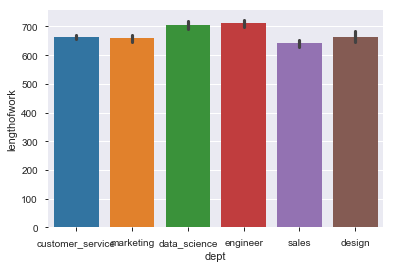

In [60]:
#Plots of the no effect
ax = sns.barplot(x="dept", y="lengthofwork", data=df5)

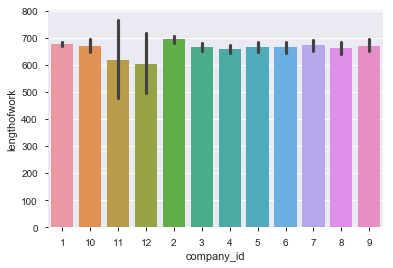

In [61]:
#Plots of the no effect
ax = sns.barplot(x="company_id", y="lengthofwork", data=df5)

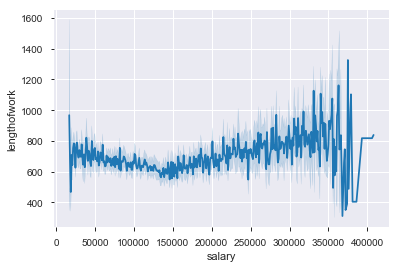

In [62]:
#Plots of the no effect
ax = sns.lineplot(x="salary", y="lengthofwork", data=df5)

In [63]:
#Doing a quick T-test examination
df10=df4[(df4['quit_date_clean'] > '2014-12-12') | (df4['quit'] < 1)]

In [64]:
from scipy.stats import ttest_ind

cat1 = df10[df10['quit']==0]
cat2 = df10[df10['quit']==1]

ttest_ind(cat1['salary'], cat2['salary'])

Ttest_indResult(statistic=1.7499889788614478, pvalue=0.08013940163222975)

In [65]:
cat1['salary'].mean()

141238.47390993568

In [66]:
cat2['salary'].mean()

138832.11678832117

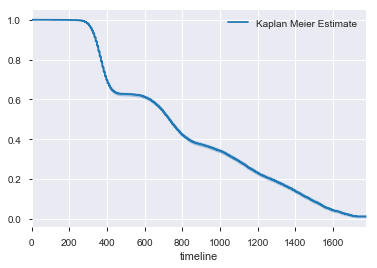

In [67]:
#Switching over to survival analysis
from lifelines import KaplanMeierFitter

## Example Data 
durations = df5['lengthofwork']
event_observed = df5['quit']

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=True) 

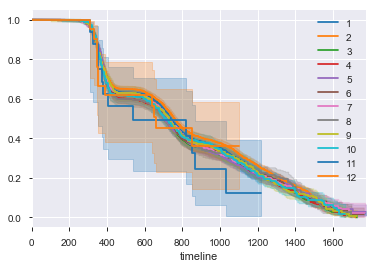

In [68]:
#Predicting Survival Across Companies (little movement between companies)
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df4.groupby('company_id'):
    kmf.fit(grouped_df["lengthofwork"], grouped_df["quit"], label=name)
    kmf.plot(ax=ax)

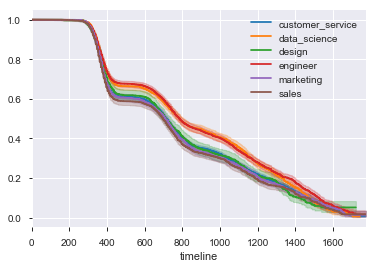

In [71]:
#Predicting Survival Across Departments (Still looks like no movement)
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df4.groupby('dept'):
    kmf.fit(grouped_df["lengthofwork"], grouped_df["quit"], label=name)
    kmf.plot(ax=ax)